In [39]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from utils.utils import log_transform
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

warnings.filterwarnings("ignore")

In [2]:
''' We have 10 points of Analyte1 data, Analyte2 data and Analyte3 data respectively. '''

# os.chdir('/media/soham/New Volume/GitHub/BTP')

analyte1 = pd.read_csv('data/Sampled_Analyte1.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte2 = pd.read_csv('data/Sampled_Analyte2.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte3 = pd.read_csv('data/Sampled_Analyte3.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)

[analyte1, analyte2, analyte3]  = log_transform([analyte1, analyte2, analyte3])
analyte1

,CFU/mL,Sensor2,Sensor1,Sensor3,log_sensor1,log_sensor2,log_sensor3
0,1.000000e+00,-65.500000,-183.780000,-68.340000,5.213739,4.182050,4.224495
1,1.000000e+00,-50.570000,-150.230000,-64.370000,5.012167,3.923359,4.164648
2,5.211692e+00,-43.093842,-140.778402,-59.382477,4.947187,3.763380,4.083999
3,5.380311e+00,-44.283032,-138.838147,-59.448728,4.933309,3.790602,4.085114
4,5.513192e+00,-42.147480,-139.644397,-59.159592,4.939099,3.741175,4.080239
...,...,...,...,...,...,...,...
85,1.696889e+07,59.643380,-78.675769,44.690700,4.365335,4.088383,3.799765
86,1.740088e+07,61.812098,-82.491236,41.859847,4.412692,4.124099,3.734327
87,1.786667e+07,58.395383,-83.225729,42.151384,4.421557,4.067237,3.741268
88,1.834069e+07,61.701299,-82.696806,41.940566,4.415181,4.122305,3.736254


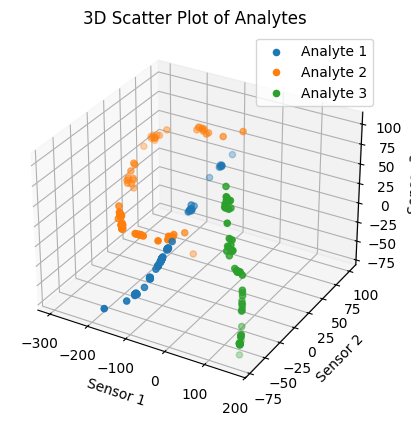

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['Sensor1'], analyte1['Sensor2'], analyte1['Sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['Sensor1'], analyte2['Sensor2'], analyte2['Sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['Sensor1'], analyte3['Sensor2'], analyte3['Sensor3'], label='Analyte 3')

ax.set_xlabel('Sensor 1')
ax.set_ylabel('Sensor 2')
ax.set_zlabel('Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()
plt.show()

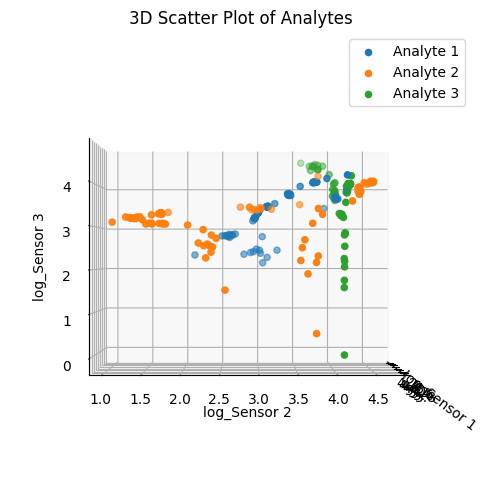

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=0, azim=0)  
plt.show()

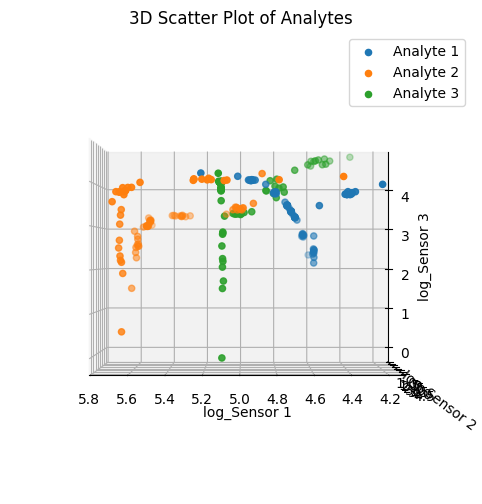

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=0, azim=90)  
plt.show()

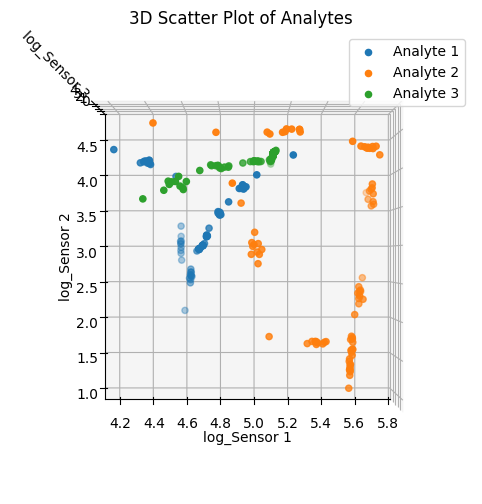

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=90, azim=270)  
plt.show()

## Analyte 1

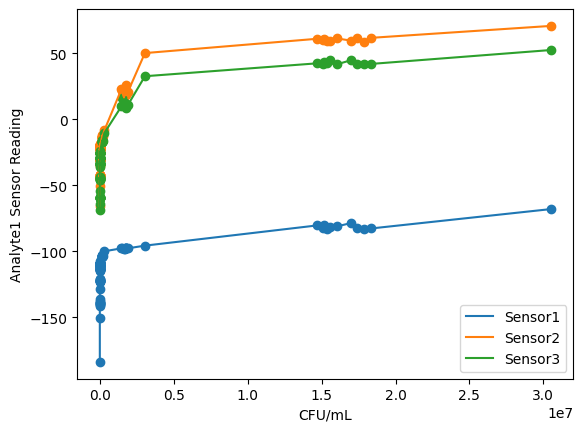

In [7]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor1'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor1'], label='Sensor1')

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor2'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor2'], label='Sensor2')

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor3'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte1 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte1.png')
plt.show()

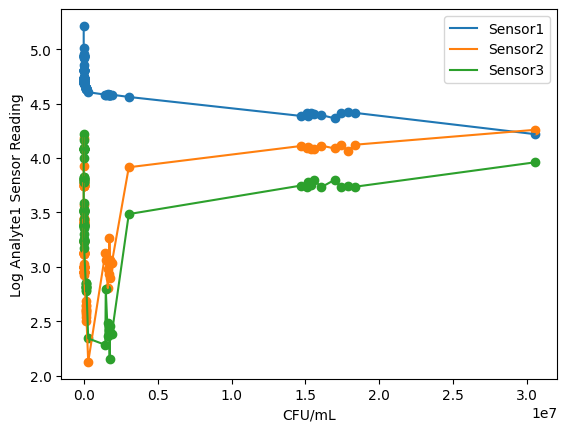

In [8]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor1'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor1'], label='Sensor1')

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor2'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor2'], label='Sensor2')

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor3'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte1 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte1.png')
plt.show()

## Analyte 2

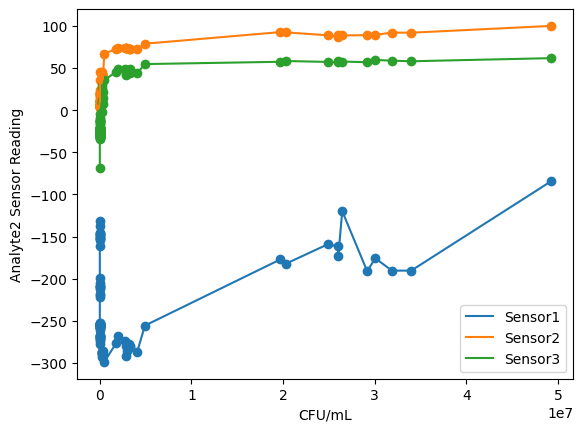

In [9]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor1'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor1'], label='Sensor1')

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor2'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor2'], label='Sensor2')

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor3'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte2 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte2.png')
plt.show()

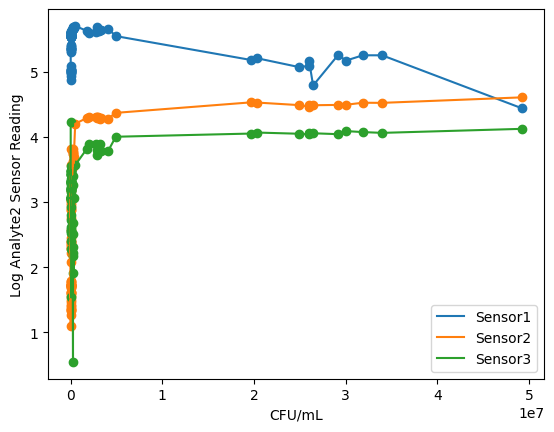

In [10]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor1'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor1'], label='Sensor1')

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor2'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor2'], label='Sensor2')

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor3'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte2 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte2.png')
plt.show()

## Analyte 3

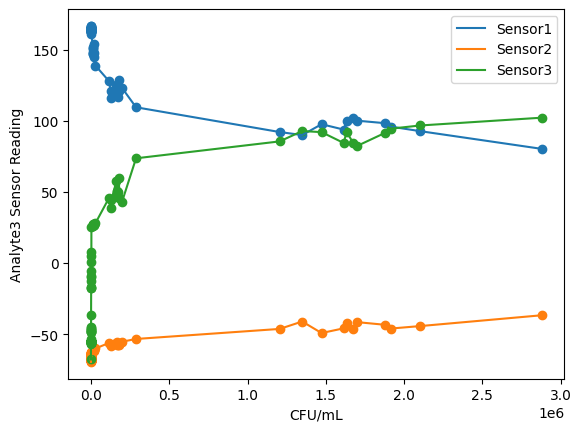

In [11]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor1'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor1'], label='Sensor1')

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor2'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor2'], label='Sensor2')

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor3'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte3 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte3.png')
plt.show()

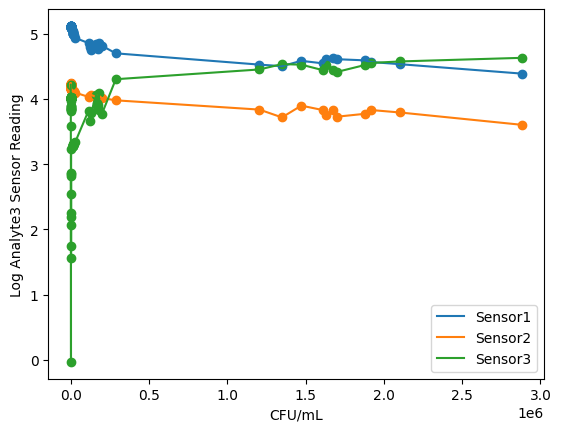

In [12]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor1'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor1'], label='Sensor1')

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor2'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor2'], label='Sensor2')

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor3'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte3 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte3.png')
plt.show()

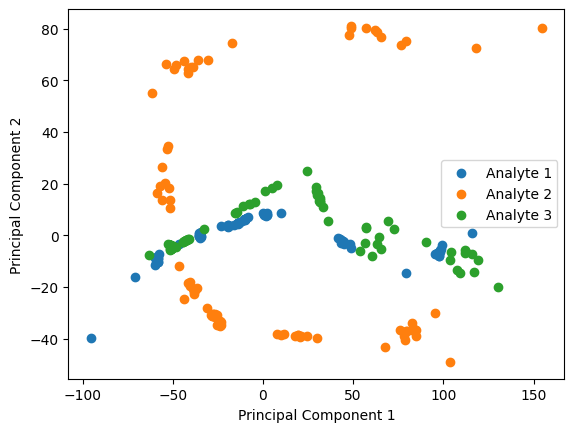

In [23]:
pca = PCA(n_components=3)
pca_analyte1 = pca.fit_transform(analyte1[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=3)
pca_analyte2 = pca.fit_transform(analyte2[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=3)
pca_analyte3 = pca.fit_transform(analyte3[['Sensor1', 'Sensor2', 'Sensor3']])

plt.scatter(pca_analyte1[:,0], pca_analyte1[:,1], label='Analyte 1')
plt.scatter(pca_analyte2[:,0], pca_analyte2[:,1], label='Analyte 2')
plt.scatter(pca_analyte3[:,0], pca_analyte3[:,1], label='Analyte 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('docs/plots/pca.png')

plt.show()

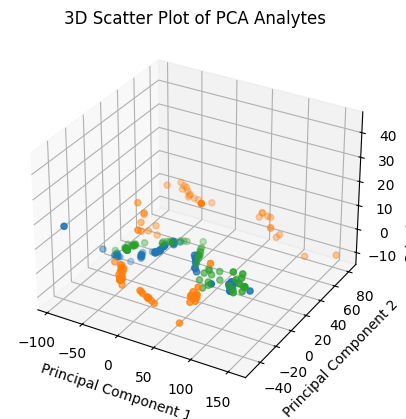

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(pca_analyte1[:, 0], pca_analyte1[:, 1], pca_analyte1[:, 2], label='Analyte 1')
ax.scatter3D(pca_analyte2[:, 0], pca_analyte2[:, 1], pca_analyte2[:, 2], label='Analyte 2')
ax.scatter3D(pca_analyte3[:, 0], pca_analyte3[:, 1], pca_analyte3[:, 2], label='Analyte 3')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Analytes')

plt.show()

In [26]:
combined_data = pd.concat([analyte1, analyte2, analyte3], axis=0)
combined_data = combined_data.sample(frac=1).reset_index(drop=True)
combined_data.head(3)

,CFU/mL,Sensor2,Sensor1,Sensor3,log_sensor1,log_sensor2,log_sensor3,cluster
0,1.350594e+04,-61.883065,148.847950,27.547464,5.002925,4.125247,3.315910,NaN
1,3.116955e+03,5.995916,-256.329590,-21.113517,5.546464,1.791079,3.049913,NaN
2,3.187076e+07,91.987884,-190.406366,58.671236,5.249161,4.521657,4.071950,NaN
